In [43]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [44]:
data = pd.read_excel('Base de dados_fluentAcademy_ portifolio.xlsx')

## Criação das colunas de análise

### Nova colunas de análise: Status_contato, Contato_agendado, Contato_nivelado

In [45]:
# Nova coluna 'Status_contato' com base na coluna 'Data de fechamento'
data['Status_contato'] = data['Data de fechamento'].apply(lambda x: 'Fechado' if pd.notna(x) else 'não_fechado')

In [46]:
data [['Status_contato']]

,Status_contato
0,Fechado
1,Fechado
2,Fechado
3,Fechado
4,Fechado
...,...
24995,não_fechado
24996,não_fechado
24997,não_fechado
24998,não_fechado


In [47]:
# Nova coluna 'Contato_nivelado' com base na coluna 'Data do teste de nivelamento'
data['Contato_nivelado'] = data['Data do teste de nivelamento'].apply(lambda x: 'Nivelado' if pd.notna(x) else 'Não_nivelado')

In [48]:
data [['Contato_nivelado']]

,Contato_nivelado
0,Nivelado
1,Nivelado
2,Nivelado
3,Nivelado
4,Nivelado
...,...
24995,Não_nivelado
24996,Não_nivelado
24997,Não_nivelado
24998,Não_nivelado


In [49]:
# Nova coluna 'Contato_agendado' com base na coluna 'Data do Agendamento'
data['Contato_agendado'] = data['Data do Agendamento'].apply(lambda x: 'Agendado' if pd.notna(x) else 'Não_agendado')

In [50]:
data[['Contato_agendado']]

,Contato_agendado
0,Agendado
1,Agendado
2,Agendado
3,Agendado
4,Agendado
...,...
24995,Não_agendado
24996,Não_agendado
24997,Não_agendado
24998,Não_agendado


### Nova colunas de análise: Geração e Idade

In [51]:
import pandas as pd

def classificar_faixa_etaria(data_nascimento):
    if pd.to_datetime('1946-01-01') <= data_nascimento <= pd.to_datetime('1964-12-31'):
        return "Baby Boomers"
    elif pd.to_datetime('1965-01-01') <= data_nascimento <= pd.to_datetime('1980-12-31'):
        return "Generation X"
    elif pd.to_datetime('1981-01-01') <= data_nascimento <= pd.to_datetime('1996-12-31'):
        return "Millennials"
    elif pd.to_datetime('1997-01-01') <= data_nascimento <= pd.to_datetime('2010-12-31'):
        return "Generation Z"
    elif data_nascimento >= pd.to_datetime('2011-01-01'):
        return "Generation Alpha"
    else:
        return ""

data['Geração'] = data['Data de Nascimento'].apply(classificar_faixa_etaria)


In [52]:
import pandas as pd
import datetime

hoje = datetime.datetime.now()

def calcular_idade(data_nascimento):
    anos = hoje.year - data_nascimento.year
    meses = hoje.month - data_nascimento.month
    if hoje.day < data_nascimento.day:
        meses -= 1
    idade = anos + (meses / 12)
    return round(idade, 0)

data['Idade'] = data['Data de Nascimento'].apply(calcular_idade)


In [53]:
data[['Geração','Idade']]

,Geração,Idade
0,Millennials,35.0
1,Millennials,31.0
2,Baby Boomers,66.0
3,Generation Z,22.0
4,Generation Z,22.0
...,...,...
24995,Baby Boomers,59.0
24996,Baby Boomers,63.0
24997,Generation Z,25.0
24998,Generation X,57.0


### Nova colunas de análise: taxa_engajamento e classifica_engajamento

In [54]:
import pandas as pd

def calcular_taxa_engajamento(row):
    if row['Mensagens Recebidas'] != 0:
        return row['Mensagens Enviadas'] / row['Mensagens Recebidas']
    else:
        return "Divisão por zero"

data['taxa_engajamento'] = data.apply(calcular_taxa_engajamento, axis=1)


In [55]:
import pandas as pd

def classificar_engajamento(valor):
    if valor <= 2:
        return "Baixo"
    elif valor <= 5:
        return "Médio"
    else:
        return "Alto"

data['classifica_engajamento'] = data['Mensagens Respondidas'].apply(classificar_engajamento)


In [56]:
data[['taxa_engajamento', 'classifica_engajamento']]

,taxa_engajamento,classifica_engajamento
0,2.0,Baixo
1,2.0,Baixo
2,1.5,Baixo
3,Divisão por zero,Baixo
4,Divisão por zero,Baixo
...,...,...
24995,1.25,Baixo
24996,1.4,Baixo
24997,2.0,Baixo
24998,Divisão por zero,Baixo


### Nova colunas de análise: periodo_agendamento, dia_agendamento, periodo_nivelamento e dia_nivelamento

In [57]:
import pandas as pd

def classificar_periodo_agendamento(data_agendamento):
    if pd.isna(data_agendamento):
        return "Não_agendou"
    elif data_agendamento.month == 3 and data_agendamento.day:
        return "Março"
    elif data_agendamento.month == 4 and data_agendamento.day <= 7:
        return "Primeira semana de abril"
    elif data_agendamento.month == 4 and data_agendamento.day <= 14:
        return "Segunda semana de abril"
    elif data_agendamento.month == 4 and data_agendamento.day <= 21:
        return "Terceira semana de abril"
    else:
        return "Últimas semanas de abril"

data['periodo_agendamento'] = data['Data do Agendamento'].apply(classificar_periodo_agendamento)


In [58]:
import pandas as pd

def obter_dia_semana_em_portugues(data_agendamento):
    if pd.notna(data_agendamento):
        dia_semana = data_agendamento.strftime('%A')
        return dia_semana
    else:
        return "Não agendou"

data['dia_agendamento'] = data['Data do Agendamento'].apply(obter_dia_semana_em_portugues)


In [59]:
import pandas as pd

def classificar_periodo_nivelamento(data_nivelamento):
    if pd.isna(data_nivelamento):
        return "Não_nivelou"
    elif data_nivelamento.month == 3 and data_nivelamento.day:
        return "Março"
    elif data_nivelamento.month == 4 and data_nivelamento.day <= 7:
        return "Primeira semana de abril"
    elif data_nivelamento.month == 4 and data_nivelamento.day <= 14:
        return "Segunda semana de abril"
    elif data_nivelamento.month == 4 and data_nivelamento.day <= 21:
        return "Terceira semana de abril"
    else:
        return "Últimas semanas de abril"

data['periodo_nivelamento'] = data['Data do teste de nivelamento'].apply(classificar_periodo_nivelamento)


In [60]:
import pandas as pd

def obter_dia_semana_em_portugues(data_nivelamento):
    if pd.notna(data_nivelamento):
        dia_semana = data_nivelamento.strftime('%A')
        return dia_semana
    else:
        return "Não nivelou"

data['dia_nivelamento'] = data['Data do teste de nivelamento'].apply(obter_dia_semana_em_portugues)


In [61]:
data[['periodo_agendamento', 'dia_agendamento', 'periodo_nivelamento', 'dia_nivelamento']]

,periodo_agendamento,dia_agendamento,periodo_nivelamento,dia_nivelamento
0,Março,Wednesday,Primeira semana de abril,Friday
1,Março,Wednesday,Primeira semana de abril,Thursday
2,Março,Wednesday,Primeira semana de abril,Tuesday
3,Março,Wednesday,Março,Friday
4,Março,Wednesday,Março,Thursday
...,...,...,...,...
24995,Não_agendou,Não agendou,Não_nivelou,Não nivelou
24996,Não_agendou,Não agendou,Não_nivelou,Não nivelou
24997,Não_agendou,Não agendou,Não_nivelou,Não nivelou
24998,Não_agendou,Não agendou,Não_nivelou,Não nivelou


### Nova colunas de análise: tempo_criacao_agenda, tempo_agendamento_nivelamento

In [62]:
import pandas as pd

def classificar_tempo_criacao_agenda(data_criacao, data_agendamento):
    if pd.isna(data_criacao) or pd.isna(data_agendamento):
        return "Vazio"
    elif (data_agendamento - data_criacao).days >= 30:
        return "6. 1 Mês"
    elif (data_agendamento - data_criacao).days >= 22:
        return "5. Mais de 3 semanas"
    elif (data_agendamento - data_criacao).days >= 15:
        return "4. Mais de 2 semanas"
    elif (data_agendamento - data_criacao).days >= 8:
        return "3. Mais de 1 semana"
    elif (data_agendamento - data_criacao).days >= 1:
        return "2. Menos de 1 semana"
    elif (data_agendamento - data_criacao).days >= 0:
        return "1. Novos"
    else:
        return ""

data['tempo_criacao_agenda'] = data.apply(lambda row: classificar_tempo_criacao_agenda(row['Data da Criação'], row['Data do Agendamento']), axis=1)


In [63]:
import pandas as pd

def classificar_tempo_agendamento_nivelamento(data_agendamento, data_nivelamento):
    if pd.isna(data_agendamento) or pd.isna(data_nivelamento):
        return "Vazio"
    elif (data_nivelamento - data_agendamento).days >= 30:
        return "6. 1 Mês"
    elif (data_nivelamento - data_agendamento).days >= 22:
        return "5. Mais de 3 semanas"
    elif (data_nivelamento - data_agendamento).days >= 15:
        return "4. Mais de 2 semanas"
    elif (data_nivelamento - data_agendamento).days >= 8:
        return "3. Mais de 1 semana"
    elif (data_nivelamento - data_agendamento).days >= 1:
        return "2. Menos de 1 semana"
    elif (data_nivelamento - data_agendamento).days >= 0:
        return "1. Recém agendou"
    else:
        return ""

data['tempo_agendamento_nivelamento'] = data.apply(lambda row: classificar_tempo_agendamento_nivelamento(row['Data do Agendamento'], row['Data do teste de nivelamento']), axis=1)


In [64]:
data['tempo_criacao_agenda'].value_counts()

tempo_criacao_agenda
Vazio                   19068
2. Menos de 1 semana     2161
3. Mais de 1 semana      1306
1. Novos                 1214
4. Mais de 2 semanas      822
5. Mais de 3 semanas      428
6. 1 Mês                    1
Name: count, dtype: int64

In [65]:
data['tempo_agendamento_nivelamento'].value_counts()

tempo_agendamento_nivelamento
Vazio                   19999
2. Menos de 1 semana     4455
3. Mais de 1 semana       477
4. Mais de 2 semanas       34
5. Mais de 3 semanas       23
1. Recém agendou           12
Name: count, dtype: int64

### Nova colunas de análise: duracao_criacao_agendamento, duracao_agendamento_nivelamento e duracao_total 

In [66]:
import pandas as pd

data['duracao_criacao_agendamento'] = (pd.to_timedelta(data['Data do Agendamento'] - data['Data da Criação'])
                                       .dt.total_seconds() / 86400)  # 86400 segundos em um dia


In [67]:
data['duracao_criacao_agendamento']

0        0.292361
1        0.292361
2        0.292361
3        0.335417
4        0.335417
           ...   
24995         NaN
24996         NaN
24997         NaN
24998         NaN
24999         NaN
Name: duracao_criacao_agendamento, Length: 25000, dtype: float64

In [68]:
import pandas as pd


data['duracao_agendamento_nivelamento'] = (pd.to_timedelta(data['Data do teste de nivelamento'] - data['Data do Agendamento'])
                                       .dt.total_seconds() / 86400)  # 86400 segundos em um dia


In [69]:
data['duracao_agendamento_nivelamento']

0        9.0
1        8.0
2        6.0
3        2.0
4        1.0
        ... 
24995    NaN
24996    NaN
24997    NaN
24998    NaN
24999    NaN
Name: duracao_agendamento_nivelamento, Length: 25000, dtype: float64

In [70]:
import pandas as pd

data['duracao_total'] = data['Data de fechamento'] - data['Data da Criação']


In [71]:
import pandas as pd

data['duracao_total'] = (pd.to_timedelta(data['Data do teste de nivelamento'] - data['Data do Agendamento'])
                                       .dt.total_seconds() / 86400)  # 86400 segundos em um dia


In [72]:
data['duracao_total']

0        9.0
1        8.0
2        6.0
3        2.0
4        1.0
        ... 
24995    NaN
24996    NaN
24997    NaN
24998    NaN
24999    NaN
Name: duracao_total, Length: 25000, dtype: float64

## Análise Descritiva


### Box Plot da duração em dias da data de criação até a data de agendamento. 


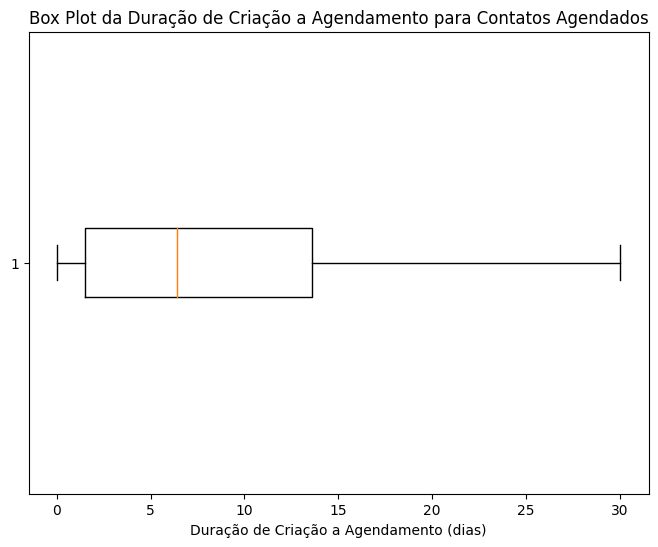

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

data_agendado = data[data['Contato_agendado'] == 'Agendado']

plt.figure(figsize=(8, 6))
plt.boxplot(data_agendado['duracao_criacao_agendamento'], vert=False)
plt.xlabel('Duração de Criação a Agendamento (dias)')
plt.title('Box Plot da Duração de Criação a Agendamento para Contatos Agendados')
plt.show()


### Box Plot da duração em dias da data de agendamento até a data de nivelamento. 

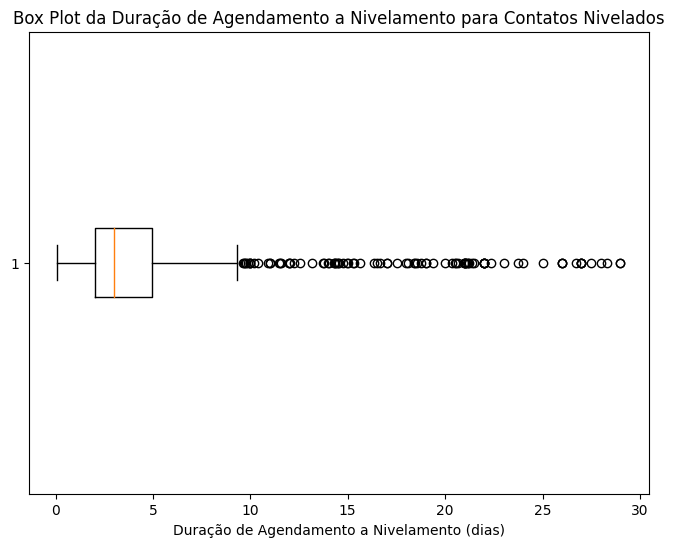

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

data_nivelado = data[data['Contato_nivelado'] == 'Nivelado']

plt.figure(figsize=(8, 6))
plt.boxplot(data_nivelado['duracao_agendamento_nivelamento'], vert=False)  # Removed .dt.days
plt.xlabel('Duração de Agendamento a Nivelamento (dias)')
plt.title('Box Plot da Duração de Agendamento a Nivelamento para Contatos Nivelados')
plt.show()




### Box Plot da duração em dias da data de criação até a data de fechamento. 


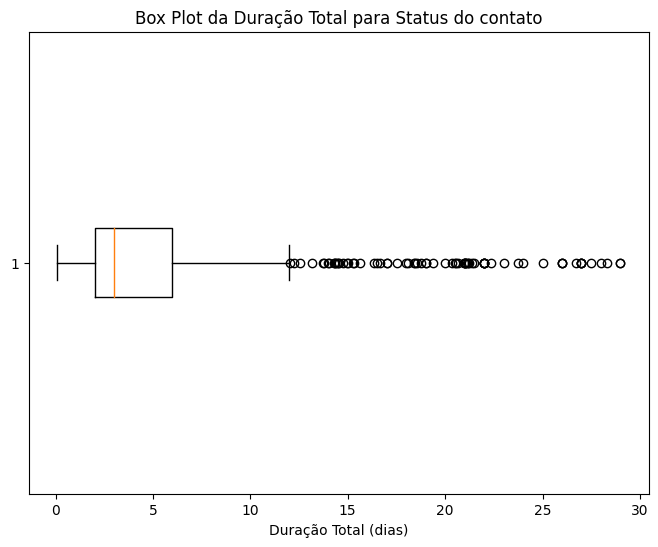

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

data_fechado = data[data['Status_contato'] == 'Fechado']

plt.figure(figsize=(8, 6))
plt.boxplot(data_fechado['duracao_total'], vert=False)  # Removed .dt.days
plt.xlabel('Duração Total (dias)')
plt.title('Box Plot da Duração Total para Status do contato')
plt.show()


### Gráfico de barras da duração média (data de criação -data de agendamento) por grupo Status_contato


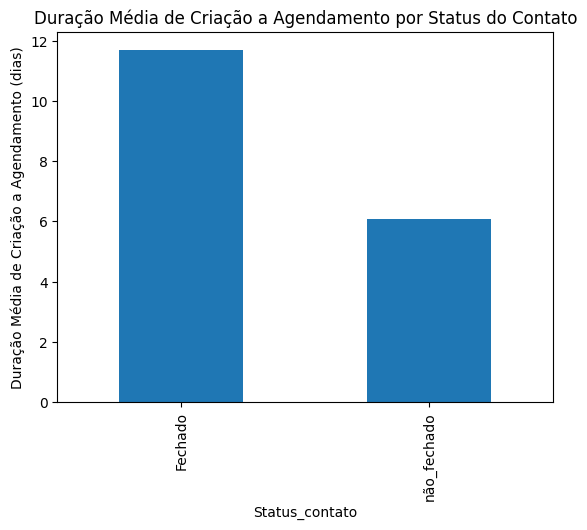

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

if not pd.api.types.is_numeric_dtype(data['duracao_criacao_agendamento']):
    data['duracao_criacao_agendamento'] = data['duracao_criacao_agendamento'].dt.days


grupo_duracao = data.groupby('Status_contato')['duracao_criacao_agendamento'].mean()

grupo_duracao.plot(kind='bar')
plt.xlabel('Status_contato')
plt.ylabel('Duração Média de Criação a Agendamento (dias)')
plt.title('Duração Média de Criação a Agendamento por Status do Contato')
plt.show()


### Densidade de Probabilidade da Idade por Status do Contato

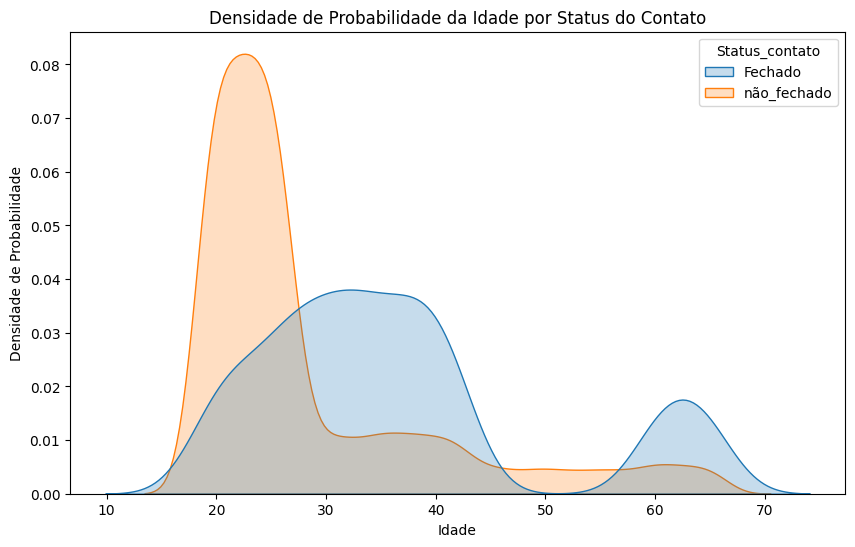

In [78]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

hoje = datetime.datetime.now()

def calcular_idade(data_nascimento):
    anos = hoje.year - data_nascimento.year
    meses = hoje.month - data_nascimento.month
    if hoje.day < data_nascimento.day:
        meses -= 1
    idade = anos + (meses / 12)
    return round(idade, 0)

data['Idade'] = data['Data de Nascimento'].apply(calcular_idade)

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Idade', hue='Status_contato', common_norm=False, fill=True)

plt.xlabel('Idade')
plt.ylabel('Densidade de Probabilidade')
plt.title('Densidade de Probabilidade da Idade por Status do Contato')
plt.show()


### Histograma da coluna Idade dividida por grupos da coluna Status_contato

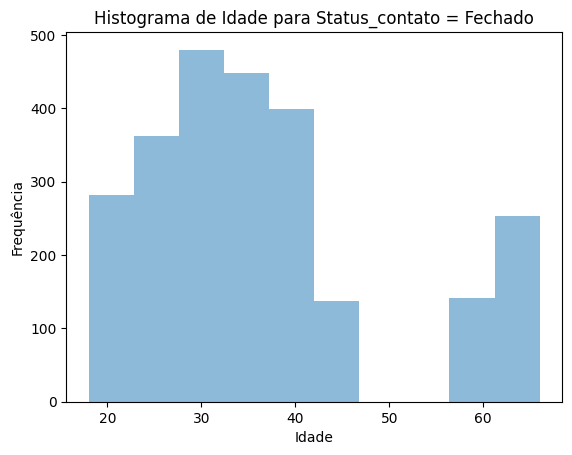

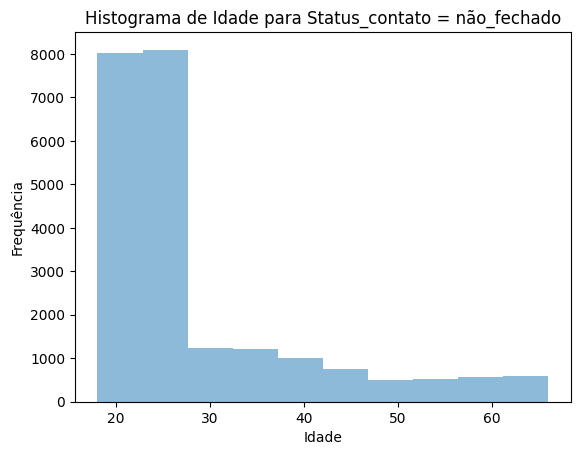

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

data['Status_contato'] = data['Status_contato'].str.strip()

grupos = data.groupby('Status_contato')

# Criar um histograma para cada grupo
for nome_grupo, grupo in grupos:
    plt.figure()
    plt.hist(grupo['Idade'], bins=10, alpha=0.5)
    plt.title(f'Histograma de Idade para Status_contato = {nome_grupo}')
    plt.xlabel('Idade')
    plt.ylabel('Frequência')
    plt.show()


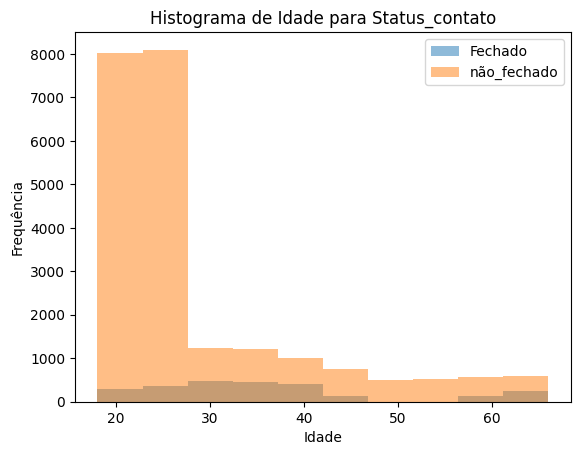

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

data['Status_contato'] = data['Status_contato'].str.strip()

grupos = data.groupby('Status_contato')

plt.figure()
for nome_grupo, grupo in grupos:
    plt.hist(grupo['Idade'], bins=10, alpha=0.5, label=nome_grupo)

plt.title('Histograma de Idade para Status_contato')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend()
plt.show()


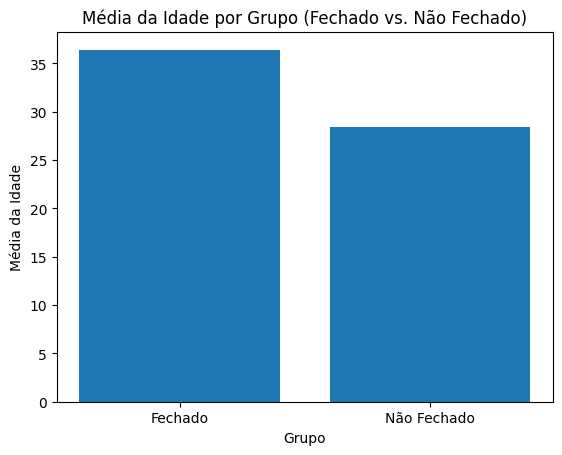

In [81]:
import pandas as pd
import matplotlib.pyplot as plt


grupo_contato_fechado = data[data['Status_contato'] == 'Fechado']['Idade']
grupo_nao_fechado = data[data['Status_contato'] == 'não_fechado']['Idade']

media_contato_fechado = grupo_contato_fechado.mean()
media_nao_fechado = grupo_nao_fechado.mean()

medias = [media_contato_fechado, media_nao_fechado]
grupos = ['Fechado', 'Não Fechado']

plt.bar(grupos, medias)

plt.xlabel('Grupo')
plt.ylabel('Média da Idade')
plt.title('Média da Idade por Grupo (Fechado vs. Não Fechado)')

plt.show()


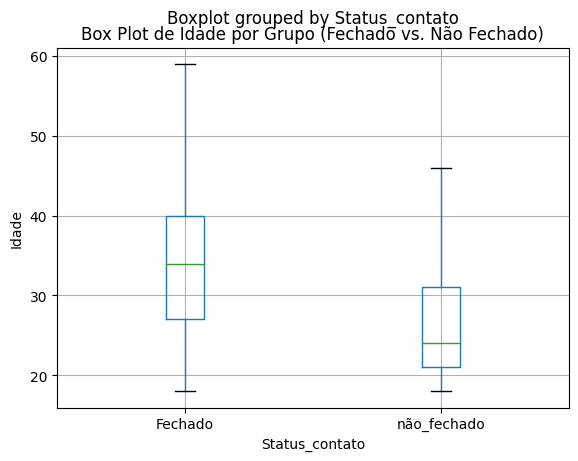

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()


data.boxplot(column='Idade', by='Status_contato', showfliers=False, ax=ax)

ax.set_xlabel('Status_contato')
ax.set_ylabel('Idade')

plt.title('Box Plot de Idade por Grupo (Fechado vs. Não Fechado)')

plt.show()


### Porcentagem de Fonte de Origem dividida por grupo Status_contato

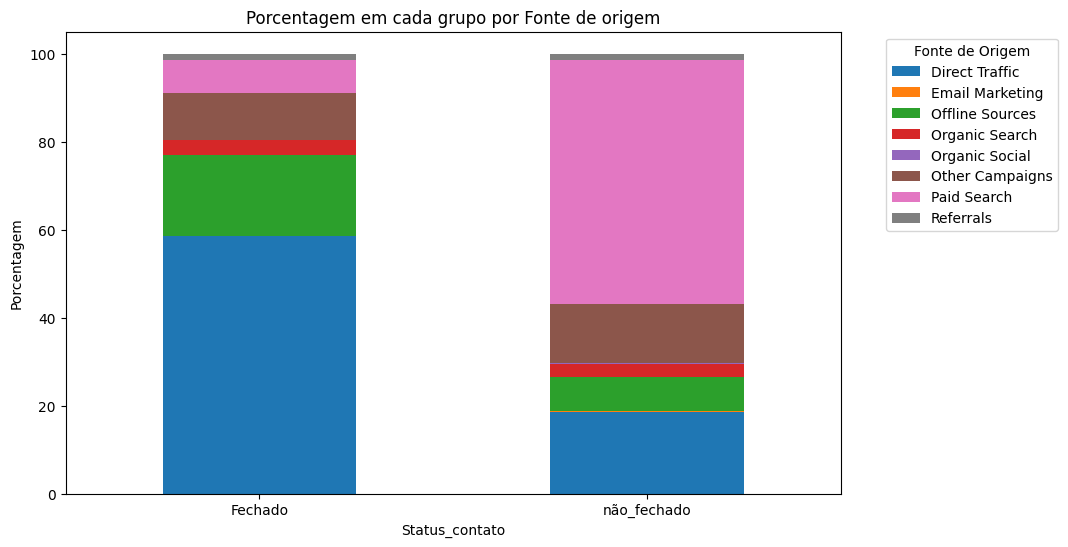

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

data['Status_contato'] = data['Status_contato'].str.strip()

agrupado = data.groupby(['Status_contato', 'Fonte de Origem']).size().unstack()

# Defina uma paleta de cores manual para cada categoria da coluna "Fonte de Origem"
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

porcentagem = agrupado.div(agrupado.sum(axis=1), axis=0) * 100

ax = porcentagem.plot(kind='bar', stacked=True, figsize=(10, 6), color=cores)

plt.title('Porcentagem em cada grupo por Fonte de origem')
plt.xlabel('Status_contato')
plt.ylabel('Porcentagem')
plt.xticks(rotation=0)
plt.legend(title='Fonte de Origem', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### Porcentagem do valor categorigo Direct Traffic (Fonte de Origem) dividida por grupo Status_contato

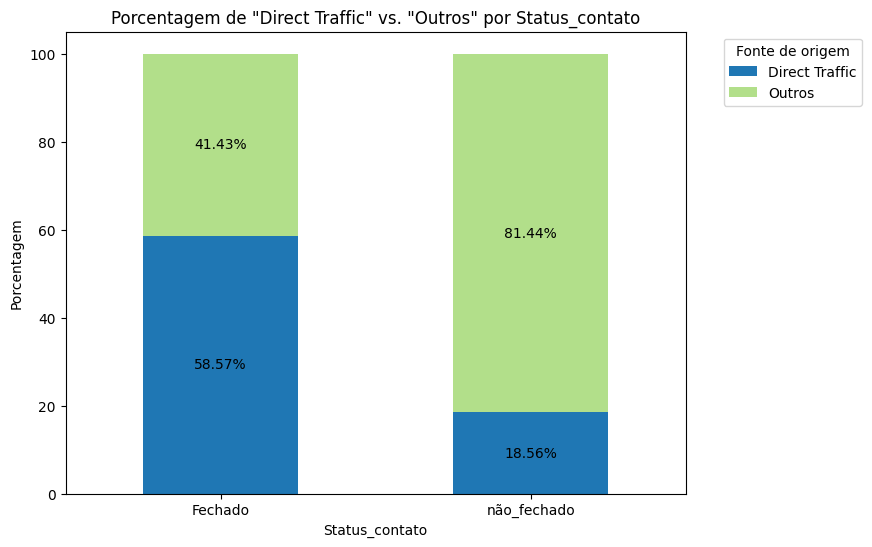

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

data['Status_contato'] = data['Status_contato'].str.strip()
data['Fonte de Origem'] = data['Fonte de Origem'].str.strip()

data_direct_traffic = data[data['Fonte de Origem'] == 'Direct Traffic']

data_outros = data[data['Fonte de Origem'] != 'Direct Traffic']

agrupado_direct_traffic = data_direct_traffic.groupby('Status_contato').size()

agrupado_outros = data_outros.groupby('Status_contato').size()

porcentagem_direct_traffic = (agrupado_direct_traffic / (agrupado_direct_traffic + agrupado_outros)) * 100
porcentagem_outros = 100 - porcentagem_direct_traffic

colors = ['#1f77b4', '#b2df8a']  # Azul e Verde

plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

ax = pd.DataFrame({'Direct Traffic': porcentagem_direct_traffic, 'Outros': porcentagem_outros}).plot(kind='bar', stacked=True, figsize=(8, 6))

plt.title('Porcentagem de "Direct Traffic" vs. "Outros" por Status_contato')
plt.xlabel('Status_contato')
plt.ylabel('Porcentagem')
plt.xticks(rotation=0)
plt.legend(title='Fonte de origem', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()


### Média de Mensagens respondidas por grupo de Status do contato 

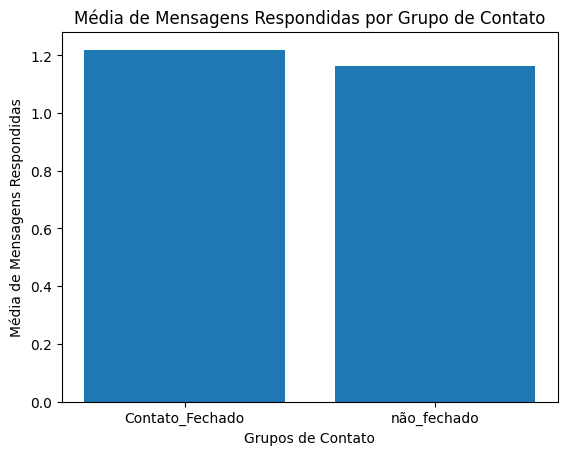

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

grupo_contato_fechado = data[data['Status_contato'] == 'Fechado']
grupo_nao_fechado = data[data['Status_contato'] == 'não_fechado']

media_contato_fechado = grupo_contato_fechado['Mensagens Respondidas'].mean()
media_nao_fechado = grupo_nao_fechado['Mensagens Respondidas'].mean()

grupos = ['Contato_Fechado', 'não_fechado']
medias = [media_contato_fechado, media_nao_fechado]

plt.bar(grupos, medias)
plt.xlabel('Grupos de Contato')
plt.ylabel('Média de Mensagens Respondidas')
plt.title('Média de Mensagens Respondidas por Grupo de Contato')
plt.show()



## Aplicação do teste de normalidade de Shapiro-Wilk

In [86]:
import pandas as pd
from scipy.stats import shapiro

data_agendado = data[data['Contato_agendado'] == 'Agendado']

dados = data_agendado['duracao_criacao_agendamento']

# teste de normalidade de Shapiro-Wilk
stat, p_value = shapiro(dados)

print(f'Estatística de teste: {stat}')
print(f'Valor p: {p_value}')

if p_value < 0.05:
    print('Os dados não seguem uma distribuição normal.')
else:
    print('Não há evidência para rejeitar a hipótese de normalidade.')


Estatística de teste: 0.8941954374313354
Valor p: 0.0
Os dados não seguem uma distribuição normal.


/Users/denisecavalcante/anaconda3/envs/nome_do_ambiente/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [87]:
import pandas as pd
from scipy.stats import shapiro

data_agendado = data[data['Contato_agendado'] == 'Agendado']

dados = data_agendado['Idade'] 

# teste de normalidade de Shapiro-Wilk
stat, p_value = shapiro(dados)

print(f'Estatística de teste: {stat}')
print(f'Valor p: {p_value}')

if p_value < 0.05:
    print('Os dados não seguem uma distribuição normal.')
else:
    print('Não há evidência para rejeitar a hipótese de normalidade.')


Estatística de teste: 0.8335098028182983
Valor p: 0.0
Os dados não seguem uma distribuição normal.


## Aplicação do teste de hipótese não pareado Mann-Whitney

In [88]:
import pandas as pd
from scipy.stats import mannwhitneyu

grupo_contato_fechado = data[data['Status_contato'] == 'Fechado']['Idade']
grupo_nao_fechado = data[data['Status_contato'] == 'não_fechado']['Idade']

# teste de Mann-Whitney U para grupos independentes
statistic, p_value = mannwhitneyu(grupo_contato_fechado, grupo_nao_fechado, alternative='two-sided')

print(f'Estatística U: {statistic}')
print(f'Valor p: {p_value}')

if p_value < 0.05:
    print('Diferença estatisticamente significativa entre os grupos.')
else:
    print('Não há evidência de diferença estatisticamente significativa entre os grupos.')


Estatística U: 40925440.0
Valor p: 2.0857613329401418e-305
Diferença estatisticamente significativa entre os grupos.


In [89]:
import pandas as pd
from scipy.stats import mannwhitneyu

data_agendado = data[data['Contato_agendado'] == 'Agendado']

grupo_fechado = data_agendado[data_agendado['Status_contato'] == 'Fechado']['duracao_criacao_agendamento']
grupo_nao_fechado = data_agendado[data_agendado['Status_contato'] == 'não_fechado']['duracao_criacao_agendamento']

statistic, p_value = mannwhitneyu(grupo_fechado, grupo_nao_fechado, alternative='two-sided')

print(f'Estatística U: {statistic}')
print(f'Valor p: {p_value}')

if p_value < 0.05:
    print('Diferença estatisticamente significativa entre os grupos.')
else:
    print('Não há evidência de diferença estatisticamente significativa entre os grupos.')


Estatística U: 5828552.0
Valor p: 4.1319653456233575e-123
Diferença estatisticamente significativa entre os grupos.


In [90]:
import pandas as pd
from scipy.stats import mannwhitneyu

grupo_contato_fechado = data[data['Status_contato'] == 'Fechado']['Mensagens Respondidas']
grupo_nao_fechado = data[data['Status_contato'] == 'não_fechado']['Mensagens Respondidas']

# teste de Mann-Whitney U para grupos independentes
statistic, p_value = mannwhitneyu(grupo_contato_fechado, grupo_nao_fechado, alternative='two-sided')

print(f'Estatística U: {statistic}')
print(f'Valor p: {p_value}')

if p_value < 0.05:
    print('Diferença estatisticamente significativa entre os grupos.')
else:
    print('Não há evidência de diferença estatisticamente significativa entre os grupos.')


Estatística U: 28793605.5
Valor p: 0.047244929955132825
Diferença estatisticamente significativa entre os grupos.


## Realização do teste qui-quadrado

In [91]:
import pandas as pd
from scipy.stats import chi2_contingency


tabela_contingencia = pd.crosstab(data['Fonte de Origem'] == 'Direct Traffic', data['Fonte de Origem'])

chi2, p, _, _ = chi2_contingency(tabela_contingencia)

print(f'Estatística qui-quadrado: {chi2}')
print(f'Valor p: {p}')

if p < 0.05:
    print('A porcentagem de "Direct Traffic" difere significativamente das outras categorias de "Fonte de Origem".')
else:
    print('Não há evidência de diferença significativa na porcentagem de "Direct Traffic" em relação às outras categorias de "Fonte de Origem".')


Estatística qui-quadrado: 24999.999999999996
Valor p: 0.0
A porcentagem de "Direct Traffic" difere significativamente das outras categorias de "Fonte de Origem".


## Médias dos grupos 'Fechado' e 'não_fechado'

In [92]:
import pandas as pd

grupo_contato_fechado = data[data['Status_contato'] == 'Fechado']['Idade']
grupo_nao_fechado = data[data['Status_contato'] == 'não_fechado']['Idade']

media_contato_fechado = grupo_contato_fechado.mean()
media_nao_fechado = grupo_nao_fechado.mean()

print(f"Média de idade para o grupo 'Contato_Fechado': {media_contato_fechado}")
print(f"Média de idade para o grupo 'Não_Fechado': {media_nao_fechado}")


Média de idade para o grupo 'Contato_Fechado': 36.40351578106272
Média de idade para o grupo 'Não_Fechado': 28.407120949459927


In [93]:
import pandas as pd

grupo_contato_fechado = data[data['Status_contato'] == 'Fechado']['duracao_criacao_agendamento']
grupo_nao_fechado = data[data['Status_contato'] == 'não_fechado']['duracao_criacao_agendamento']

media_contato_fechado = grupo_contato_fechado.mean()
media_nao_fechado = grupo_nao_fechado.mean()

print(f"Média de duração para o grupo 'Contato_Fechado': {media_contato_fechado}")
print(f"Média de duração para o grupo 'Não_Fechado': {media_nao_fechado}")


Média de duração para o grupo 'Contato_Fechado': 11.697181715275004
Média de duração para o grupo 'Não_Fechado': 6.0657346651113055


In [94]:
import pandas as pd

grupo_contato_fechado = data[data['Status_contato'] == 'Fechado']['Mensagens Respondidas']
grupo_nao_fechado = data[data['Status_contato'] == 'não_fechado']['Mensagens Respondidas']

media_contato_fechado = grupo_contato_fechado.mean()
media_nao_fechado = grupo_nao_fechado.mean()

print(f"Média de Mensagens Respondidas para o grupo 'Contato_Fechado': {media_contato_fechado}")
print(f"Média de Mensagens Respondidas para o grupo 'Não_Fechado': {media_nao_fechado}")


Média de Mensagens Respondidas para o grupo 'Contato_Fechado': 1.2197363164202957
Média de Mensagens Respondidas para o grupo 'Não_Fechado': 1.1634440147575231
